In [46]:
import os
import pandas as pd

account_df = pd.read_csv(os.getcwd() + "/../data/account.csv", delimiter=";")

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

account_df.head()

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


In [48]:
account_df.isnull().any().sum()

0

''

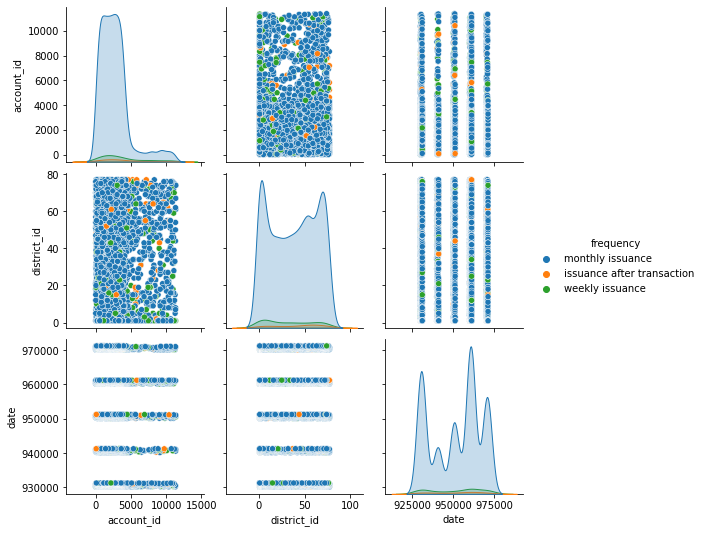

In [54]:
sb.pairplot(account_df, hue="frequency")
;

In [128]:
from utils import *

client_df = pd.read_csv(os.getcwd() + "/../data/client.csv", delimiter=";")

client_df["birth_date"] = client_df["birth_number"].apply(lambda x: read_date(x))
client_df["sex"] = client_df["birth_number"].apply(lambda x: "female" if int(str(x)[2:4]) > 50 else "male") 

client_df["age"] = client_df["birth_number"].apply(lambda x: int(99 - int(str(x)[:2])))

client_df.head()

,client_id,birth_number,district_id,birth_date,sex,age
0,1,706213,18,1970-12-13,female,29
1,2,450204,1,1945-02-04,male,54
2,3,406009,1,1940-10-09,female,59
3,4,561201,5,1956-12-01,male,43
4,5,605703,5,1960-07-03,female,39


''

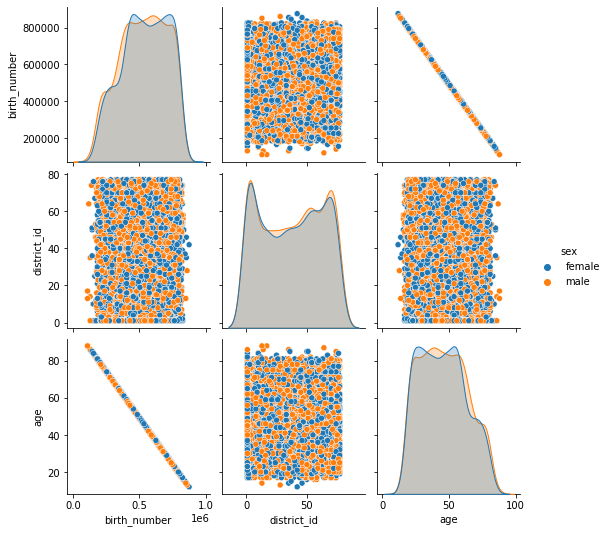

In [122]:
sb.pairplot(client_df.loc[:, client_df.columns != "client_id"], hue="sex")
;

In [125]:
dispositions_df = pd.read_csv(os.getcwd() + "/../data/disp.csv", delimiter=";")
dispositions_df["client_id"].value_counts(sort=True)

1        1
3788     1
3786     1
3785     1
3784     1
        ..
1897     1
1896     1
1895     1
1894     1
13998    1
Name: client_id, Length: 5369, dtype: int64

In [188]:
loan_test_df = pd.read_csv(os.getcwd() + "/../data/loan_test.csv", delimiter=";")
card_test_df = pd.read_csv(os.getcwd() + "/../data/card_test.csv", delimiter=";")

joined_loan_test_df = loan_test_df.merge(card_test_df.merge(dispositions_df, on="disp_id", how="left"), on="account_id", how="left")
joined_loan_test_df.rename(columns={"type_x": "card_type"}, inplace=True)
joined_loan_test_df["card_type"].replace({"classic": 1, "junior": 2, "gold": 3}, inplace=True) 

joined_loan_test_df.head()
loan_test_df.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5895,4473,970103,93960,60,1566,NaN
1,7122,10365,970104,260640,36,7240,NaN
2,6173,5724,970108,232560,48,4845,NaN
3,6142,5591,970121,221880,60,3698,NaN
4,5358,2018,970121,38520,12,3210,NaN


In [212]:
loan_train_df = pd.read_csv(os.getcwd() + "/../data/loan_train.csv", delimiter=";")
card_train_df = pd.read_csv(os.getcwd() + "/../data/card_train.csv", delimiter=";")
joined_loan_train_df = loan_train_df.merge(card_train_df.merge(dispositions_df, on="disp_id"), on="account_id")
joined_loan_train_df.rename(columns={"type_x": "card_type"}, inplace=True)

# Replace text with numeric data
joined_loan_train_df["card_type"].replace({"classic": 1, "junior": 2, "gold": 3}, inplace=True) 
joined_loan_train_df["type_y"].replace({"OWNER": 1, "USER": 2}, inplace=True) 

joined_loan_train_df.head(50)
# joined_loan_train_df.count() #Doesn't count NA values

,loan_id,account_id,date,amount,duration,payments,status,card_id,disp_id,card_type,issued,client_id,type_y
0,6577,7753,940311,51696,24,2154,1,1005,9285,1,931107,9593,1
1,5595,3050,940902,82896,12,6908,1,577,3687,1,940215,3687,1
2,7243,11042,951204,217152,36,6032,1,1225,13268,1,951122,13576,1
3,5900,4503,960101,135360,48,2820,1,783,5433,2,951024,5433,1
4,6550,7614,960518,320592,48,6679,1,989,9119,1,960221,9427,1
5,5311,1766,960615,30060,60,501,1,337,2141,1,960101,2141,1
6,6992,9790,960727,133968,48,2791,1,1134,11742,1,960531,12050,1
7,7305,11359,960806,54024,12,4502,1,1247,13660,1,950613,13968,1
8,5088,544,960822,91152,24,3798,1,119,655,1,960808,655,1
9,7154,10520,961205,417600,60,6960,1,1187,12635,3,960717,12943,1


In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = loan_train_df.drop("status", axis=1)
y = loan_train_df["status"]

X_train = loan_train_df.drop("status", axis=1)
y_train = loan_train_df["status"]

X_test = loan_test_df.drop("status", axis=1)
y_test = loan_test_df["status"] 

# Create Decision Tree classifier object
classifier = DecisionTreeClassifier()

# Train Decision Tree classifier
classifier = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

result = pd.DataFrame({"Id": loan_test_df["loan_id"], "Predicted": y_pred})
result.to_csv("result.csv", index=False)